In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
import tensorflow as tf
from tensorflow.keras import layers
device_name = tf.test.gpu_device_name()

mydir=F'/content/drive/My Drive/ML_comp/'

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.ndimage import median_filter

In [ ]:
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats

In [221]:
train_static_well_dat=pd.read_csv(mydir+'/ANTICLINE-main/wellbore_data_preproduction_well.csv')
test_static_well_dat=pd.read_csv(mydir+'/ANTICLINE-main/wellbore_data_producer_wells.csv')

In [222]:
static_well_dat=pd.concat([test_static_well_dat,train_static_well_dat])

In [223]:
# add layer as a feature
static_well_dat['layer']=np.arange(static_well_dat.shape[0])%20

In [ ]:
#Index(['Well_ID', 'X, m', 'Y, m', 'Depth, m', 'Porosity, fraction',
#       'Permeability, mD', 'Acoustic Impedance, kg*s/m^2', 'Rock facies',
#       'Density, g/cm3', 'Compressible velocity, m/s', 'Youngs modulus, GPa',
 #      'Shear velocity, m/s', 'Shear modulus, GPa', 'layer', 'lith_id'],
#      dtype='object')

In [224]:
# import 2d map data
s_map=np.load(mydir+'/ANTICLINE-main/2d_sand_propotion.npy')
s_sh_map=np.load(mydir+'/ANTICLINE-main/2d_sandy_shale_propotion.npy')
sh_s_map=np.load(mydir+'/ANTICLINE-main/2d_shaly_sand_propotion.npy')
sh_map=np.load(mydir+'/ANTICLINE-main/2d_shale_propotion.npy')
top_map=np.load(mydir+'/ANTICLINE-main/2d_top_depth.npy')
ai_map=np.load(mydir+'/ANTICLINE-main/2d_ai.npy')

In [225]:
prod_data=pd.read_csv(mydir+'/ANTICLINE-main/production_history.csv')

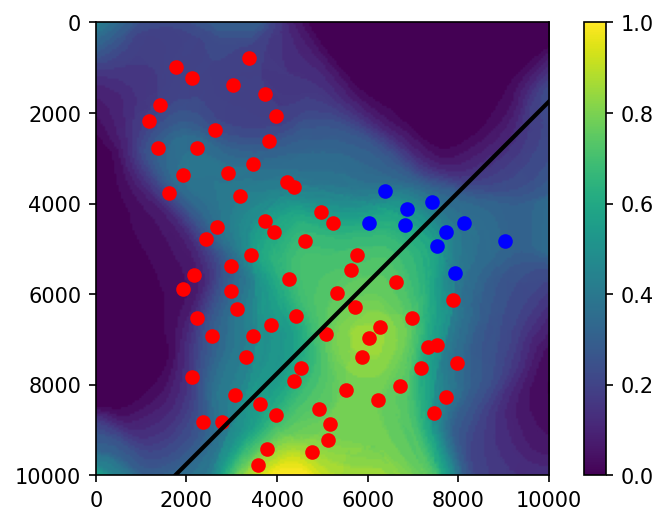

In [226]:
well_train_loc=train_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]
well_test_loc=test_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]



plt.figure(dpi=150)
plt.imshow((s_map),extent=[0,10000,10000,0])#top_map
plt.scatter(well_train_loc[:,1],well_train_loc[:,2],color='blue')
plt.scatter(well_test_loc[:,1],well_test_loc[:,2],color='red')

x = np.linspace(0,10000, 50)
fault = -x + 11750
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.ylim([10000,0])
plt.colorbar()

In [ ]:
#calculate distance to the fault
x0y0=np.array([0,11750])
dxdy=well_test_loc[:,1:]-x0y0

In [ ]:
dist=((dxdy[:,0]+dxdy[:,1])/np.sqrt(2)).astype(float)

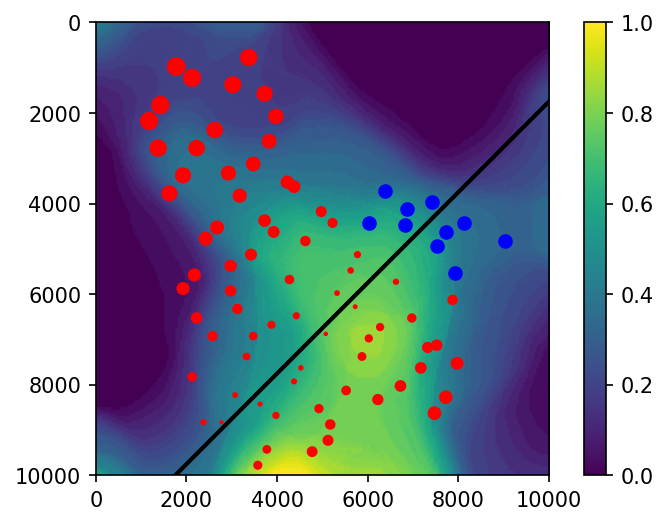

In [ ]:
well_train_loc=train_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]
well_test_loc=test_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]



plt.figure(dpi=150)
plt.imshow((s_map),extent=[0,10000,10000,0])#top_map
plt.scatter(well_train_loc[:,1],well_train_loc[:,2],color='blue')
plt.scatter(well_test_loc[:,1],well_test_loc[:,2],s=np.abs(dist)/100,color='red')

x = np.linspace(0,10000, 50)
fault = -x + 11750
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.ylim([10000,0])
plt.colorbar()

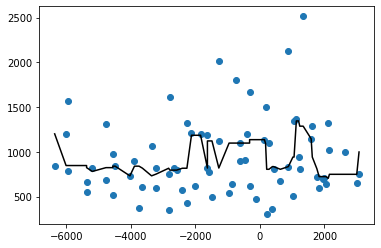

In [ ]:

plt.scatter(dist,prod_data['Cumulative oil production (3 yr), MSTB'].values)
sort_dist=np.argsort(dist)
sort_prod=np.argsort(prod_data['Cumulative oil production (3 yr), MSTB'].values)
dist=dist[sort_dist]
prod=prod_data['Cumulative oil production (3 yr), MSTB'].values[sort_dist]
plt.plot(dist,median_filter(prod,8),color='black')

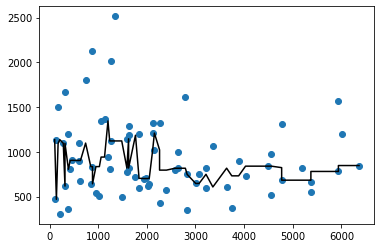

In [ ]:
from scipy.ndimage import median_filter
dist=np.abs(dist)
plt.scatter(dist,prod_data['Cumulative oil production (3 yr), MSTB'].values)

sort_dist=np.argsort(dist)
sort_prod=np.argsort(prod_data['Cumulative oil production (3 yr), MSTB'].values)
dist=dist[sort_dist]
prod=prod_data['Cumulative oil production (3 yr), MSTB'].values[sort_dist]
plt.plot(dist,median_filter(prod,5),color='black')

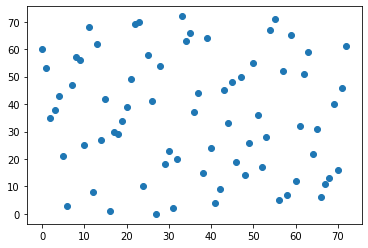

In [ ]:
# rank correlation
plt.scatter(sort_dist,sort_prod)

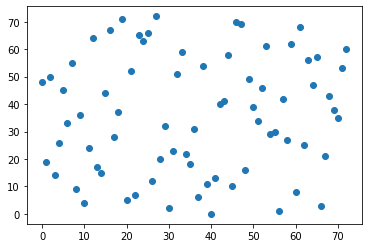

In [ ]:
sort_dist=np.argsort(np.abs(dist))
plt.scatter(sort_dist,sort_prod)

In [ ]:
#along the fault
x0y0=np.array([0,10000])
dxdy=well_test_loc[:,1:]-x0y0
dist2=((dxdy[:,0]-dxdy[:,1])/np.sqrt(2)).astype(float)

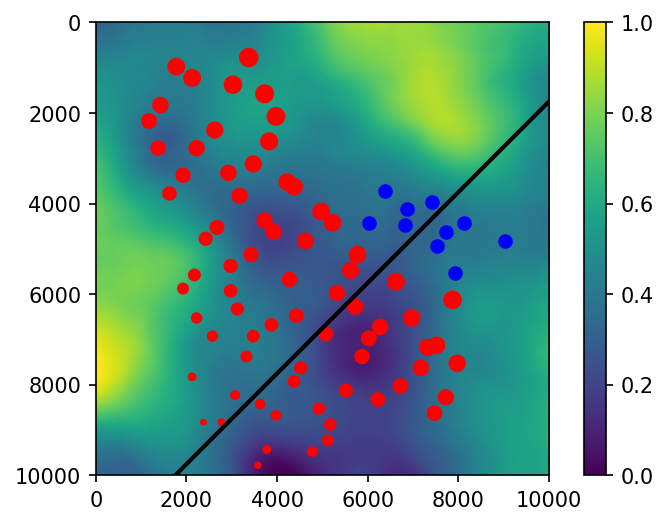

In [ ]:
well_train_loc=train_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]
well_test_loc=test_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]



plt.figure(dpi=150)
plt.imshow((ai_map),extent=[0,10000,10000,0])#top_map
plt.scatter(well_train_loc[:,1],well_train_loc[:,2],color='blue')
plt.scatter(well_test_loc[:,1],well_test_loc[:,2],s=np.abs(dist2-2000)/100,color='red')

x = np.linspace(0,10000, 50)
fault = -x + 11750
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.ylim([10000,0])
plt.colorbar()

In [227]:
prod=prod_data[['Cumulative oil production (3 yr), MSTB','Cumulative Water production (3 yr), MSTB']].values

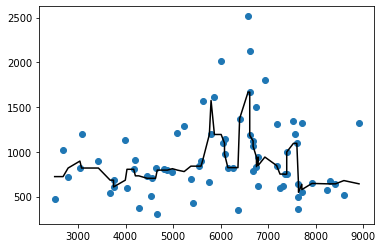

In [ ]:
from scipy.ndimage import median_filter
dist=np.abs(dist2)
plt.scatter(dist2,prod_data['Cumulative oil production (3 yr), MSTB'].values)

sort_dist=np.argsort(dist2)
sort_prod=np.argsort(prod_data['Cumulative oil production (3 yr), MSTB'].values)

prod=prod_data['Cumulative oil production (3 yr), MSTB'].values
plt.plot(dist[sort_dist],median_filter(prod[sort_dist],5),color='black')

In [ ]:
sort_dist=np.argsort(dist2)
sort_prod=np.argsort(prod_data['Cumulative oil production (3 yr), MSTB'].values)

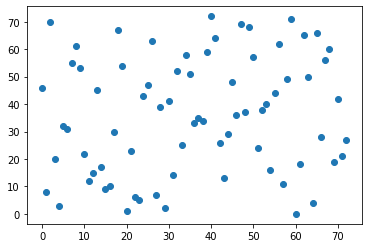

In [ ]:
# rank correlation
plt.scatter(sort_dist,sort_prod)

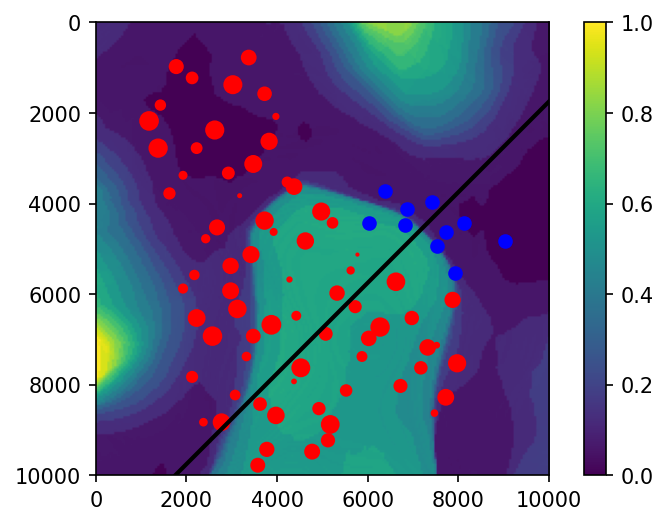

In [ ]:
# check spatial continuity of production data
prod=np.argsort(prod_data['Cumulative oil production (3 yr), MSTB'].values)
well_train_loc=train_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]
well_test_loc=test_static_well_dat[['Well_ID','X, m', 'Y, m']].values[::20]



plt.figure(dpi=150)
plt.imshow((s_sh_map),extent=[0,10000,10000,0])#top_map
plt.scatter(well_train_loc[:,1],well_train_loc[:,2],color='blue')
plt.scatter(well_test_loc[:,1],well_test_loc[:,2],s=prod,color='red')

x = np.linspace(0,10000, 50)
fault = -x + 11750
plt.plot(x, fault, color = 'k', linewidth ='2')
plt.ylim([10000,0])
plt.colorbar()


In [228]:
litho_keys = {'Shale':0,
                     'Shaly sandstone':1,
                     'Sandy shale': 2,
                     'Sandstone': 3}
static_well_dat['lith_id'] = static_well_dat['Rock facies'].map(litho_keys)


In [229]:
N=np.unique(static_well_dat['Well_ID']).size
N_features=static_well_dat.shape[-1]

In [230]:
static_well_dat_per_well=(static_well_dat.values).reshape([N,-1,N_features])

In [231]:
lith=static_well_dat_per_well[:,:,-1]
lith=lith.astype(float)
myrange=7
N_lith=4
lith_variogram=np.zeros((N_lith-1,myrange))
bad=np.isnan(lith)
for trunc in range(N_lith-1):
    lith_ind=(lith<=trunc).astype(float)
    lith_ind[bad]=np.nan
    for i in np.arange(1,myrange):
        dif_lith=lith_ind[:,i:]-lith_ind[:,:-i]
        lith_variogram[trunc,i]=np.mean((dif_lith[np.isfinite(dif_lith)]**2/2).flatten())

Text(0, 0.5, 'Indicator Variogram')

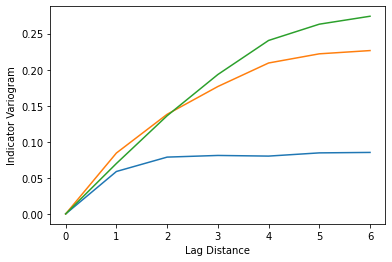

In [232]:
for i in range(N_lith-1):
    plt.plot(lith_variogram[i])
plt.xlabel('Lag Distance')
plt.ylabel('Indicator Variogram')

In [233]:
# cloud transform
static_well_dat.head(15)

,Well_ID,"X, m","Y, m","Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2",Rock facies,"Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear velocity, m/s","Shear modulus, GPa",layer,lith_id
0,Well_no_1,7325,7175,3052.8,0.13330,NaN,6981171.853,Sandstone,2.280137,3106.544655,24.721555,1690.417133,7.304717,0,3.0
1,Well_no_1,7325,7175,3053.3,0.13865,NaN,7234748.871,Sandstone,2.135061,4003.697087,23.360728,1573.847967,5.202120,1,3.0
2,Well_no_1,7325,7175,3053.8,0.14638,NaN,7157383.755,Sandstone,1.991045,3462.569030,28.232152,1636.279139,NaN,2,3.0
3,Well_no_1,7325,7175,3054.3,NaN,NaN,NaN,Sandstone,1.694242,3836.960702,29.220132,1613.043048,5.074763,3,3.0
4,Well_no_1,7325,7175,3054.8,0.14993,NaN,NaN,Sandstone,1.664371,3919.585777,NaN,1636.846284,5.277834,4,3.0
5,Well_no_1,7325,7175,3055.3,0.15250,NaN,6975785.194,Sandstone,2.165119,2850.993945,22.576821,1613.944353,NaN,5,3.0
6,Well_no_1,7325,7175,3055.8,0.15501,NaN,7202545.189,Sandstone,1.499129,4523.602700,34.801239,1786.934783,NaN,6,3.0
7,Well_no_1,7325,7175,3056.3,0.15843,NaN,7071741.046,Sandstone,2.279221,2880.522451,22.608217,1641.131286,7.470394,7,3.0
8,Well_no_1,7325,7175,3056.8,0.16004,NaN,6970094.358,Sandstone,2.188753,3015.599314,23.171841,1830.396873,5.303366,8,3.0
9,Well_no_1,7325,7175,3057.3,0.07066,NaN,7836617.444,Sandy shale,3.250634,2192.474933,NaN,1649.546273,8.764372,9,2.0


In [ ]:
static_well_dat['Permeability, mD']=np.log10(static_well_dat['Permeability, mD'])

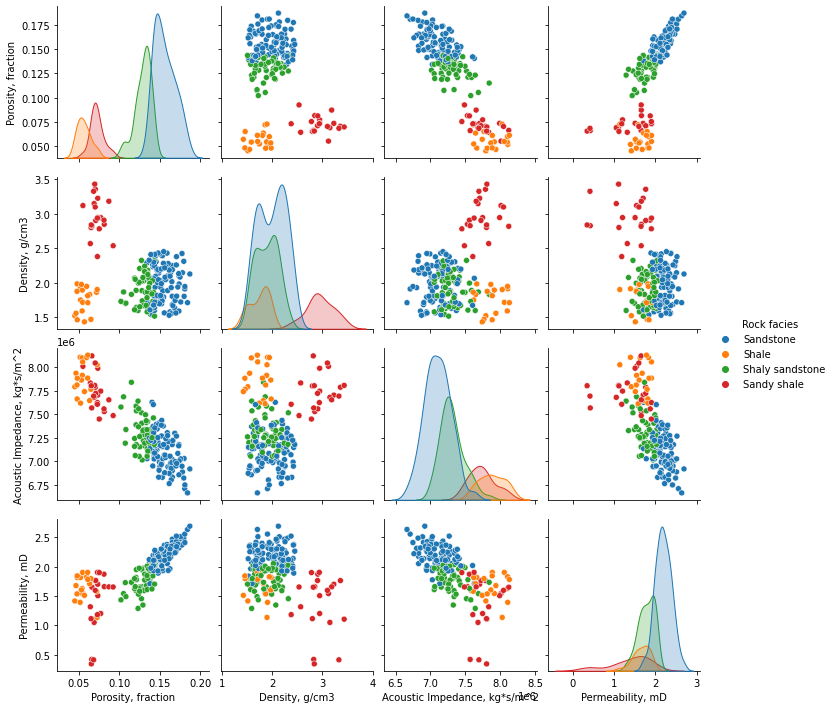

In [ ]:
sns.pairplot(static_well_dat[['Porosity, fraction','Density, g/cm3','Rock facies','Acoustic Impedance, kg*s/m^2','Permeability, mD']].dropna(axis=0,how='any'), hue="Rock facies")


In [ ]:
static_well_dat[['X''Porosity, fraction','Density, g/cm3','Rock facies','']].dropna(axis=0,how='any')

,"Porosity, fraction","Density, g/cm3",Rock facies
1,0.09096,1.872982,Shaly sandstone
2,0.05878,3.187123,Sandy shale
4,0.12285,1.678339,Shaly sandstone
6,0.12519,1.977816,Shaly sandstone
8,0.13436,1.727151,Sandstone
...,...,...,...
1455,0.16289,2.092585,Sandstone
1456,0.15909,2.109057,Sandstone
1457,0.15692,1.620103,Sandstone
1458,0.15737,1.759469,Sandstone


In [234]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

train_dat=static_well_dat[['Porosity, fraction','lith_id']].values

imp_mean = IterativeImputer()
imp_mean.fit(train_dat)
train_dat_transform=imp_mean.transform(train_dat)


In [235]:
train_dat_transform[:,-1][train_dat_transform[:,-1]<0]=0
train_dat_transform[:,-1][train_dat_transform[:,-1]>3]=3
train_dat_transform[:,-1]=np.round(train_dat_transform[:,-1])

In [ ]:
#scale
train_dat_norm=(train_dat_transform-np.min(train_dat_transform,axis=0))/(np.max(train_dat_transform,axis=0)-np.min(train_dat_transform,axis=0))

In [ ]:
train_dat_norm.shape

(1660, 2)

In [ ]:
train_dat_norm=train_dat_norm.reshape((-1,20,2))

In [ ]:
prod_data.head(3)

,Well_ID,"Cumulative oil production (1 yr), MSTB","Cumulative oil production (2 yr), MSTB","Cumulative oil production (3 yr), MSTB","Cumulative Water production (1 yr), MSTB","Cumulative Water production (2 yr), MSTB","Cumulative Water production (3 yr), MSTB"
0,Well_no_1,450.98,684.20,847.33,494.89,1236.40,2108.7
1,Well_no_2,594.43,946.61,1201.20,226.97,646.50,1187.7
2,Well_no_3,381.75,611.38,781.40,393.17,948.18,1603.1


In [236]:
train_y=prod_data['Cumulative oil production (3 yr), MSTB'].values
train_y=(train_y-train_y.min()*0.7)/(train_y.max()*1.3-train_y.min()*0.7)

In [ ]:
def get_model0():
    aa=layers.Input(shape=(20,2))
    bb=layers.Flatten()(aa)
    bb=layers.Dense(8,activation='relu')(bb)
    bb=layers.Dense(8,activation='relu')(bb)
    output=layers.Dense(1,activation='sigmoid')(bb)
    model=tf.keras.Model(aa,output)
    model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(lr=0.001))
    return model

In [ ]:
from sklearn.model_selection import KFold
np.random.seed(10)
kf = KFold(n_splits=8,shuffle=True)
error=[]
test=[]
pred=[]
for train_index, test_index in kf.split(train_dat_norm[:73,]):
    #mymodel=tf.keras.Model(aa,output)
    #mymodel.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(lr=0.01))
    mymodel=get_model0()
    mymodel.fit(train_dat_norm[:73,][train_index],train_y[train_index],validation_data=(train_dat_norm[:73,][test_index],train_y[test_index]),epochs=30)
    mypred=mymodel.predict(train_dat_norm[:73,][test_index])
    error.append(np.mean((train_y[test_index]-mypred)**2))
    test.append(train_y[test_index].copy())
    pred.append(mypred.copy())
    del mymodel








In [ ]:
error=np.array(error)
test=np.concatenate(test)
pred=np.concatenate(pred)
print(np.mean(error))

In [ ]:
pred.shape

(73, 1)

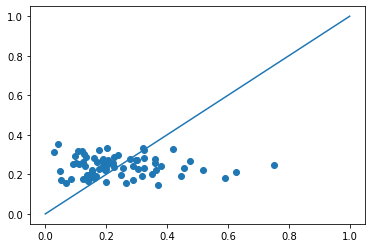

In [ ]:
xx=[0,1]
yy=[0,1]
plt.scatter(test,pred)
plt.plot(xx,yy)

In [ ]:
np.mean((train_y[test_index]-mypred)**2)

0.027605650244300502

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4, random_state=0)
np.random.seed(10)
kf = KFold(n_splits=8,shuffle=True)
error=[]
test=[]
pred=[]
for train_index, test_index in kf.split(train_dat_norm[:73,]):
    regr = RandomForestRegressor(max_depth=2, random_state=0)
    regr.fit(train_dat_norm[:73,][train_index].reshape([-1,40]),train_y[train_index])
    mypred=regr.predict(train_dat_norm[:73,][test_index].reshape([-1,40]))
    error.append(np.mean((train_y[test_index]-mypred.flatten())**2))
    test.append(train_y[test_index].copy())
    pred.append(mypred.copy())
    del regr  

In [ ]:
error=np.array(error)
test=np.concatenate(test)
pred=np.concatenate(pred)
print(np.mean(error))

0.02144128494358992


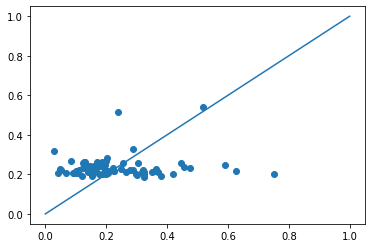

In [ ]:
xx=[0,1]
yy=[0,1]
plt.scatter(test,pred)
plt.plot(xx,yy)

In [ ]:
#CNN workflow

In [ ]:
#assign properties to grid
map_prop=np.zeros((200,200,5))
well_prop=train_dat_norm[:,:,[0,-1]]

In [ ]:
#well location map
well_loc=np.zeros((200,200))
prodmap=well_loc.copy()
X=well_test_loc[:,1].astype(float).copy()
Y=well_test_loc[:,2].astype(float).copy()
X=np.round((X-25)/50).astype(int)
Y=np.round((Y-25)/50).astype(int)
well_loc[Y,X]=1
#prod map
for i in range(len(X)):
  xx=X[i]
  yy=Y[i]
  prodmap[yy,xx]=train_y[i]


In [ ]:
map_prop=np.stack([s_map,s_sh_map,sh_s_map,sh_map,(top_map-top_map.min())/(top_map.max()-top_map.min()),(ai_map-ai_map.min())/(ai_map.max()-ai_map.min()),well_loc,prodmap],axis=-1)

In [ ]:
window=5
# extract patch
train_data1=[]
train_data2=[]
for i in range(73):
    if X[i]>window and X[i]<200-window-1 and Y[i]>window and Y[i]<200-window-1:
        map_patch=map_prop[X[i]-window:X[i]+window+1,Y[i]-window:Y[i]+window+1]
        train_data1.append(well_prop[i])
        train_data2.append(map_patch.copy())
train_data1=np.array(train_data1)
train_data2=np.array(train_data2)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
def get_model():
    aa=layers.Input(shape=(20,2))
    bb=layers.Flatten()(aa)
    bb=layers.Dense(16,activation='relu')(bb)


    map_input=layers.Input(shape=(11,11,7))
    map2=layers.Conv2D(14, kernel_size=5, strides=2, padding='same',activation='relu')(map_input)
    map2=layers.Conv2D(7, kernel_size=5, strides=2, padding='same',activation='relu')(map2)
    map3=layers.Flatten()(map2)
    map4=layers.Dense(16,activation='relu')(map3)

    dd=layers.Concatenate()([bb,map4])

    output=layers.Dense(1,activation='sigmoid')(dd)
    model=tf.keras.Model([aa,map_input],output)
    return model
    

In [ ]:
kf = KFold(n_splits=8,shuffle=True)
train_y
error=[]
test=[]
pred=[]
for train_index, test_index in kf.split(X):
    mymodel=get_model()
    mymodel.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(lr=0.01))
    mymodel.fit([train_data1[train_index],train_data2[train_index]],train_y[train_index],validation_data=([train_data1[test_index],train_data2[test_index]],train_y[test_index]),epochs=30)
    mypred=mymodel.predict([train_data1[test_index],train_data2[test_index]])
    del mymodel
    error.append(np.mean((train_y[test_index]-mypred)**2))
    test.append(train_y[test_index].copy())
    pred.append(mypred.copy())
   

0.02691248644854658


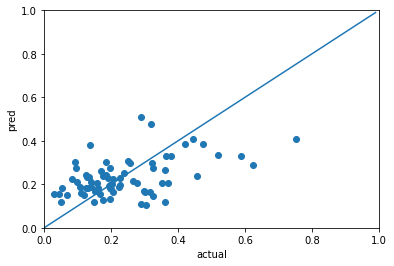

In [ ]:
plt.xlim([0,1])
plt.ylim([0,1])
xx=np.arange(0,1,0.01)
yy=xx

plt.scatter(np.concatenate(test),np.concatenate(pred))
plt.plot(xx,yy)
plt.xlabel('actual')
plt.ylabel('pred')
print(np.mean(error))

**Data Augmentation&Hierarchical optimization**

In [243]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

static_well_dat2=static_well_dat.copy()
#static_well_dat2['Permeability, mD']=np.log(static_well_dat['Permeability, mD'])
train_dat=static_well_dat2[['Porosity, fraction','lith_id','Permeability, mD']].values

imp_mean = IterativeImputer()
imp_mean.fit(train_dat)
train_dat_transform=imp_mean.transform(train_dat)
wellid=static_well_dat2['Well_ID'].values

In [244]:
poro_mean=[]
perm_mean=[]
for i in wellid[::20]:
  poro_mean.append(np.mean(train_dat_transform[:,1][wellid==i]))
  perm_mean.append((np.mean(train_dat_transform[:,2][wellid==i])))
poro_mean=np.array(poro_mean)
perm_mean=np.array(perm_mean)
poro_mean=(poro_mean-poro_mean.min()+0.1)/(poro_mean.max()-poro_mean.min()+0.1)
perm_mean=(perm_mean-perm_mean.min()+0.5)/(perm_mean.max()-perm_mean.min()+0.5)

In [245]:
#well location map
well_loc=np.zeros((200,200))
perm_map=well_loc.copy()
poro_map=well_loc.copy()
prodmap=well_loc.copy()
X=well_test_loc[:,1].astype(float).copy()
Y=well_test_loc[:,2].astype(float).copy()
X=np.round((X-25)/50).astype(int)
Y=np.round((Y-25)/50).astype(int)
well_loc[Y,X]=1
#prod map
for i in range(len(X)):
  xx=X[i]
  yy=Y[i]
  prodmap[yy,xx]=train_y[i]
  perm_map[yy,xx]=perm_mean[i]
  poro_map[yy,xx]=poro_mean[i]


In [246]:
map_prop=np.stack([s_map,s_sh_map,sh_s_map,sh_map,(top_map-top_map.min())/(top_map.max()-top_map.min()),(ai_map-ai_map.min())/(ai_map.max()-ai_map.min()),well_loc,poro_map,perm_map,prodmap],axis=-1)

In [247]:
def get_cnn():
    map_input=layers.Input(shape=(32,32,9))
    map2=layers.Conv2D(18, kernel_size=5, strides=2, padding='same',activation='relu')(map_input)
    map2=layers.Conv2D(36, kernel_size=5, strides=2, padding='same',activation='relu')(map2)
    map2=layers.Conv2D(36, kernel_size=5, strides=2, padding='same',activation='relu')(map2)
    map3=layers.Flatten()(map2)
    map4=layers.Dense(18,activation='relu')(map3)
    output=layers.Dense(1)(map4)
    model=tf.keras.Model(map_input,output)
    return model

In [248]:
from scipy.ndimage import maximum_filter,rotate

In [249]:
map_prop[:,:,6]=maximum_filter(map_prop[:,:,6],5,mode='nearest')
map_prop[:,:,7]=maximum_filter(map_prop[:,:,7],5,mode='nearest')
map_prop[:,:,8]=maximum_filter(map_prop[:,:,8],5,mode='nearest')
map_prop_train=map_prop[:100]

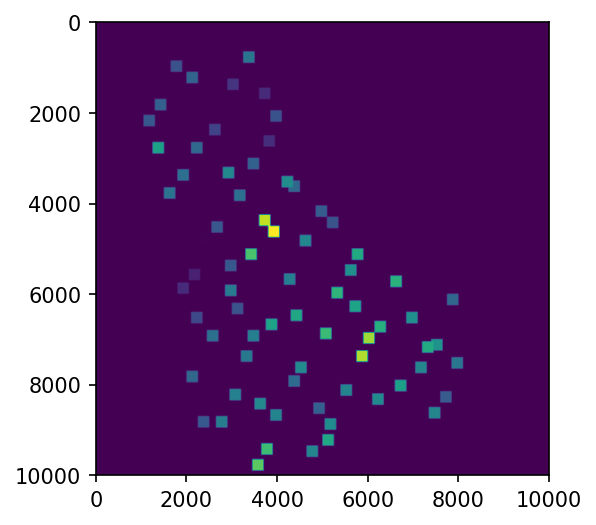

In [250]:
plt.figure(dpi=150)
plt.imshow((s_sh_map),extent=[0,10000,10000,0])#top_map
plt.imshow(map_prop[:,:,8],extent=[0,10000,10000,0])
#plt.scatter(well_test_loc[:,1],well_test_loc[:,2])


In [251]:
from sklearn.feature_extraction import image
from scipy.ndimage import rotate
window=32

In [252]:
cnn_model=get_cnn()
cnn_model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(lr=0.005))

In [ ]:


for ii in range(10000):
  map_prop_train_rot = rotate(map_prop[:,:100,:], np.random.uniform(0,360), reshape=True)
  patches = image.extract_patches_2d(map_prop_train_rot, (window, window),max_patches=2000)
  good=np.sum(patches[:,:,:,5]>0,axis=(1,2))==(patches.shape[1]*patches.shape[2])
  patches=patches[good][:64]
  target=np.sum(patches[:,:,:,-1],axis=(1,2))
  for i in range(patches.shape[0]):
    if np.random.uniform(0,1)>0.5:
      patches[i]=np.fliplr(patches[i])
    if np.random.uniform(0,1)>0.5:
      patches[i]=np.flipud(patches[i])      
  cnn_model.train_on_batch(patches[:,:,:,:-1],target)
  
  if ii%100==0:
    cnn_model.save_weights(mydir+'cnn_weight_32/cnn_weight_32_'+str(ii+100000)+'.h5')
    print(ii)



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100


In [ ]:
target

array([3.27270352, 4.94026496, 4.72134064, 3.38055915, 3.62827035,
       3.24774911, 4.68275971, 5.04731077])

In [ ]:
patches.shape

(10, 70, 70, 7)

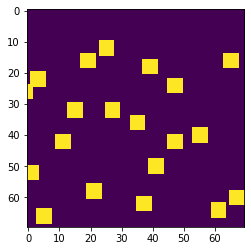

In [ ]:
plt.imshow(patches[1,:,:,6])

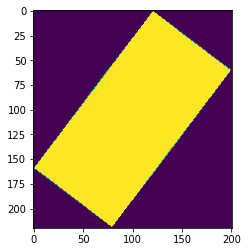

In [ ]:
plt.imshow(map_prop_train[:,:,5]>0)

In [ ]:
(map_prop_train[:,:,5]>0).astype(int).min()

1

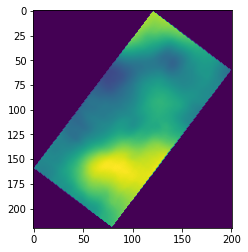

In [ ]:
plt.imshow(map_prop_train_rot[:,:,5])

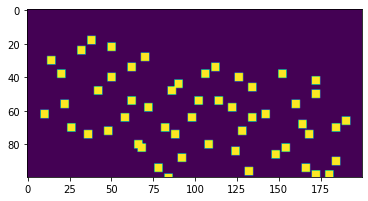

In [ ]:
plt.imshow(map_prop_train[:,:,6])